# Test modules

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append("/home/thomas/projects/nilm_at_fair/repository/")

In [3]:
from src.pulsed_power_ml.model_framework.data_io import read_training_files, load_pqsphi_file, load_fft_file, reshape_one_dim_array
from src.pulsed_power_ml.model_framework.visualizations import add_contour_plot, plot_data_point_array, get_frequencies_from_spectrum
from src.pulsed_power_ml.models.gupta_model.gupta_utils import fit_gaussian_to_peak, gaussian, calculate_background, calculate_feature_vector


In [4]:
x = np.array([15, 30, 45])
y = np.array([20, 27, 18])
a, mu, sigma = fit_gaussian_to_peak(x, y)

/home/thomas/.venv/nilm_at_fair/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


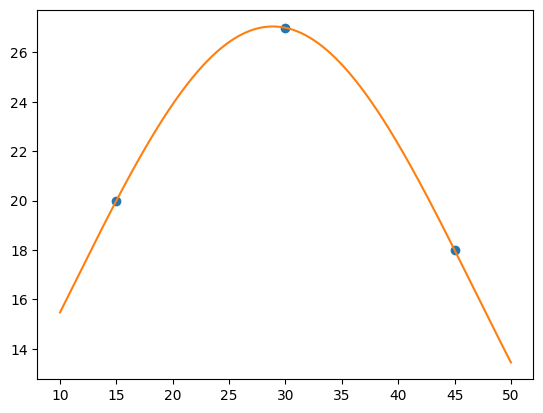

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'o')

x_gauss = np.linspace(10, 50, 1000)
y_gauss = gaussian(x_gauss, a, mu, sigma)
ax.plot(x_gauss, y_gauss)

In [6]:
folder = "/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/tube/"
p_file = "S_LEDOnOff_FFTSize131072"
fft_file = "FFTCurrent_LEDOnOff_FFTSize131072"
fft_size = 2**17

In [7]:
data_point_array = read_training_files(folder, fft_size)

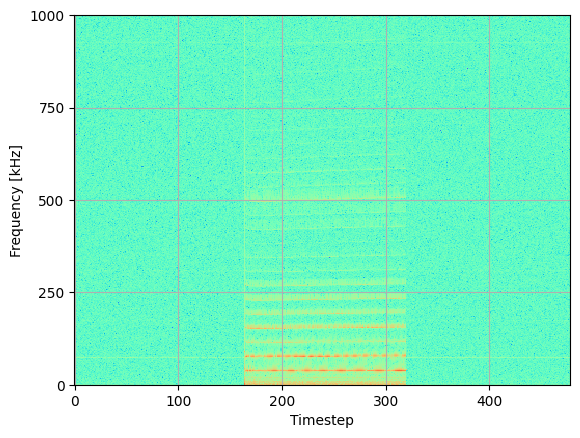

In [8]:
fig.clear()
fig = plt.figure()
ax = fig.add_subplot()
ax = add_contour_plot(data_point_array[:, int(2*fft_size/2):int(3*fft_size/2)],
                      [0, 1_000],
                      ax)

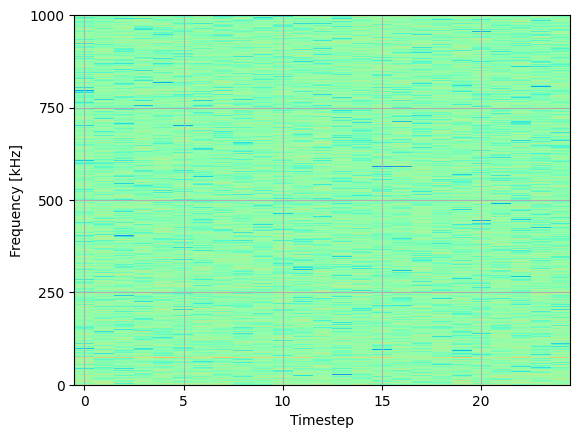

In [9]:
background_vector = data_point_array[50:75, int(2*fft_size/2):int(3*fft_size/2)]
fig.clear()
fig = plt.figure()
ax = fig.add_subplot()
ax = add_contour_plot(background_vector,
                      [0, 1_000],
                      ax)

In [10]:
background_vector = data_point_array[50:75, int(2*fft_size/2):int(3*fft_size/2)]

In [11]:
for i in range(background_vector.shape[0]):
    background_vector[i] = 10**background_vector[i]

In [12]:
background = calculate_background(background_vector)

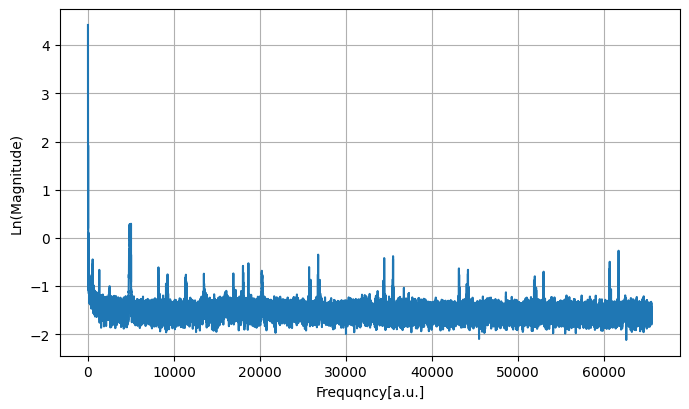

In [15]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(np.log(background))
ax.set_xlabel("Frequqncy[a.u.]")
ax.set_ylabel("Ln(Magnitude)")
ax.grid(True)

In [16]:
signal = data_point_array[200, int(2*fft_size/2):int(3*fft_size/2)]
signal = 10**signal

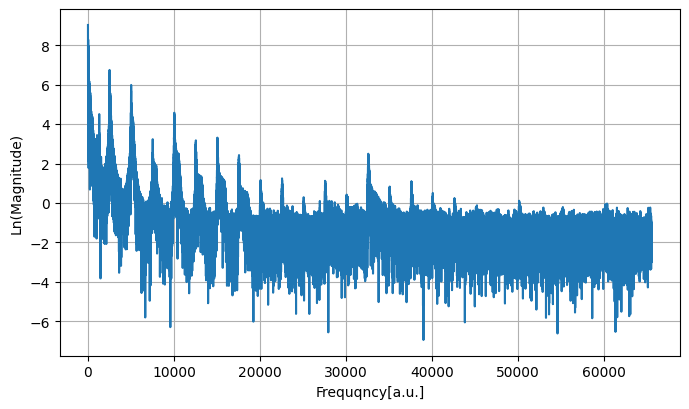

In [24]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(np.log(signal))
ax.set_xlabel("Frequqncy[a.u.]")
ax.set_ylabel("Ln(Magnitude)")
ax.grid(True)

In [18]:
cleaned_spectrum = signal - background

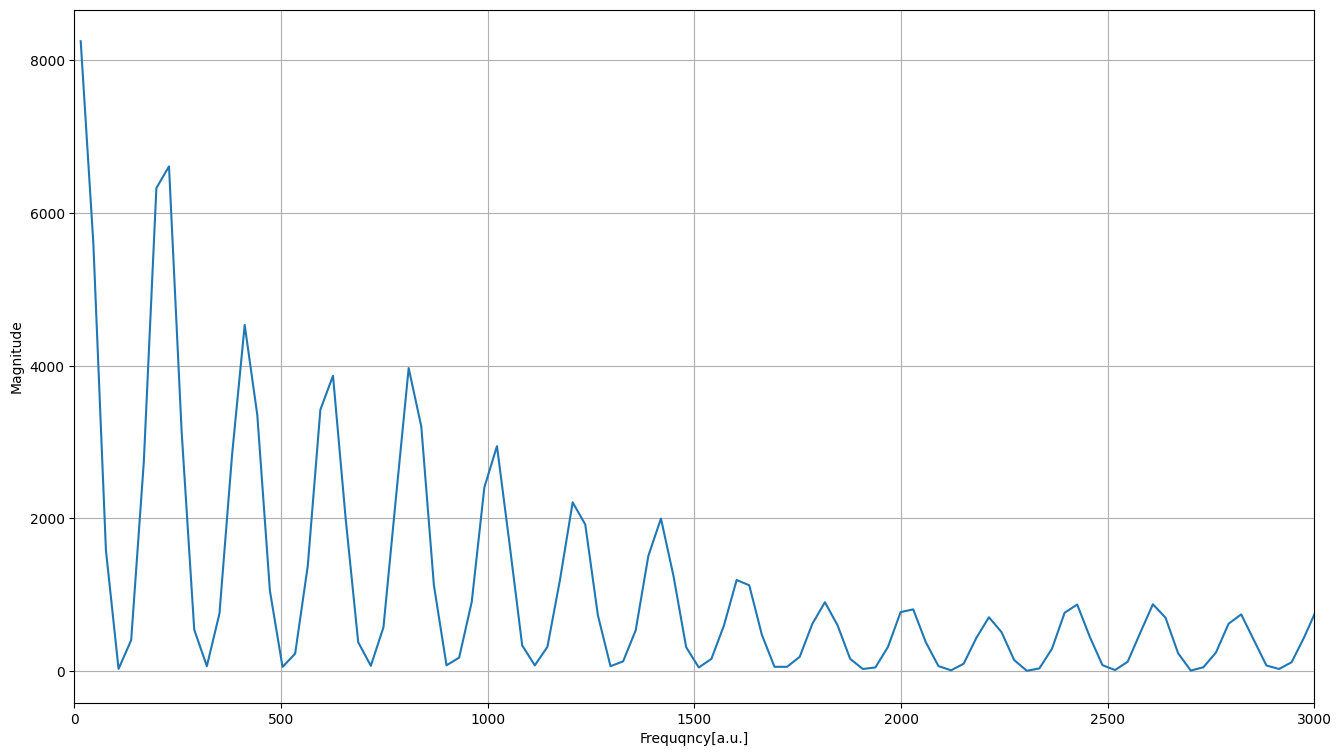

In [25]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
freq = get_frequencies_from_spectrum(cleaned_spectrum, 2_000_000)
ax.plot(freq, cleaned_spectrum)
ax.set_xlim([0, 3_000])
ax.set_xlabel("Frequqncy[a.u.]")
ax.set_ylabel("Magnitude")
ax.grid(True)

In [20]:
feature_vector = calculate_feature_vector(cleaned_spectrum,10,2**16,2_000_000)

In [ ]:
feature_vector

In [ ]:
feature_vector.shape

In [ ]:
l = np.ones(10)
10**l

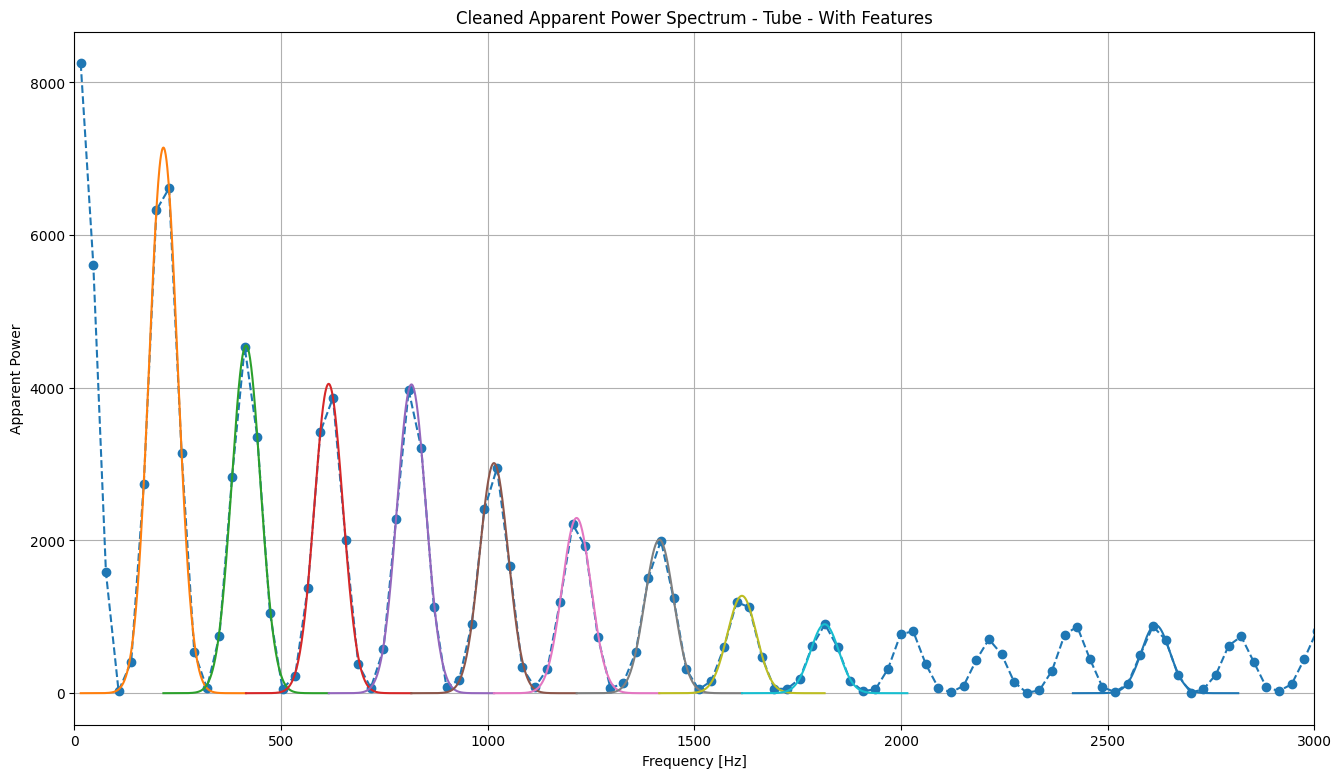

In [21]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
freq = get_frequencies_from_spectrum(cleaned_spectrum, 2_000_000)
ax.plot(freq,
        cleaned_spectrum,
        marker='o',
        linestyle='--')
ax.set_xlim([0, 3_000])

for i in range(int(len(feature_vector) / 3)):
    a, mu, sigma = feature_vector[i*3], feature_vector[i*3+1], feature_vector[i*3+2]
    freq_gauss = np.linspace(max(mu - 200, 0), mu + 200, 400)
    y = gaussian(freq_gauss, a, mu, sigma)
    ax.plot(freq_gauss, y)

ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Apparent Power")
ax.set_title("Cleaned Apparent Power Spectrum - Tube - With Features")
ax.grid(True)

fig.savefig("/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/tube/figures/cleaned_spectrum_and_feature_vector.pdf")

In [ ]:
file = "/home/thomas/projects/nilm_at_fair/repository/src/pulsed_power_ml/models/gupta_model/apparent_power_data_base.yml"

In [ ]:
import numpy as np

In [ ]:
file_name = "/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/tube/S_TubeOnOff_FFTSize131072"
apparent_power_file = np.fromfile(file_name, dtype=np.float32)

In [ ]:
apparent_power_file.max()